In [37]:
import os
import mysql.connector
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [2]:
db=mysql.connector.connect(host='localhost',user='root',passwd='Tough',database='jobportal')

In [3]:
print(db)

In [4]:
mycursor=db.cursor()

In [5]:
mycursor.execute('select * from studmarks')

In [6]:
result=mycursor.fetchall()

In [22]:
result

[('John', 'M', datetime.date(1988, 4, 5), 55, 45, 56, 87, 21, 52, 89, 65),
 ('Suresh', 'M', datetime.date(1987, 5, 4), 75, 96, 78, 64, 90, 61, 58, 2),
 ('Ramesh', 'M', datetime.date(1989, 5, 25), 25, 54, 89, 76, 95, 87, 56, 74),
 ('Jessica', 'F', datetime.date(1990, 8, 12), 78, 96, 86, 63, 54, 89, 75, 45),
 ('Jennifer', 'F', datetime.date(1989, 9, 2), 58, 96, 78, 46, 96, 77, 83, 53),
 ('Annu', 'F', datetime.date(1988, 4, 5), 45, 87, 52, 89, 55, 89, 87, 52),
 ('pooja', 'F', datetime.date(1987, 5, 4), 55, 64, 61, 58, 75, 58, 64, 61),
 ('Ritesh', 'M', datetime.date(1989, 5, 25), 54, 76, 87, 56, 25, 56, 76, 87),
 ('Farha', 'F', datetime.date(1990, 8, 12), 55, 63, 89, 75, 78, 75, 63, 89),
 ('Mukesh', 'M', datetime.date(1989, 9, 2), 96, 46, 77, 83, 58, 83, 46, 77)]

In [28]:
stud=pd.DataFrame(data=result,columns=('Name','Gender','DOB','Maths','Physics','Chemistry','English','Biology','Economics',
                                      'History','Civics'))

In [29]:
stud

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [30]:
df1=stud.iloc[:,3:-1]

In [31]:
df1

,Maths,Physics,Chemistry,English,Biology,Economics,History
0,55,45,56,87,21,52,89
1,75,96,78,64,90,61,58
2,25,54,89,76,95,87,56
3,78,96,86,63,54,89,75
4,58,96,78,46,96,77,83
5,45,87,52,89,55,89,87
6,55,64,61,58,75,58,64
7,54,76,87,56,25,56,76
8,55,63,89,75,78,75,63
9,96,46,77,83,58,83,46


In [34]:
df1_corr=df1.corr()

In [35]:
df1_corr

,Maths,Physics,Chemistry,English,Biology,Economics,History
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000


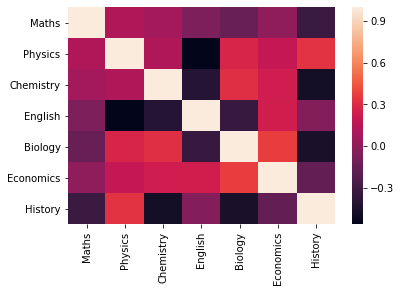

In [39]:
sns.heatmap(df1_corr)

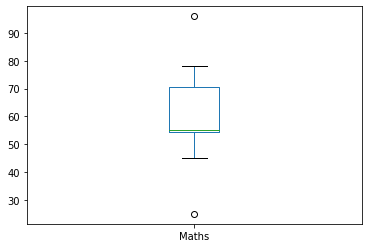

In [42]:
df1['Maths'].plot.box()

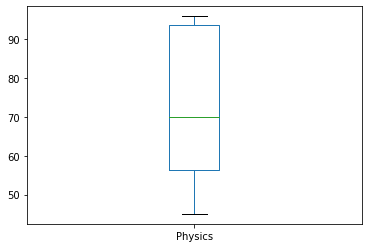

In [43]:
df1['Physics'].plot.box()

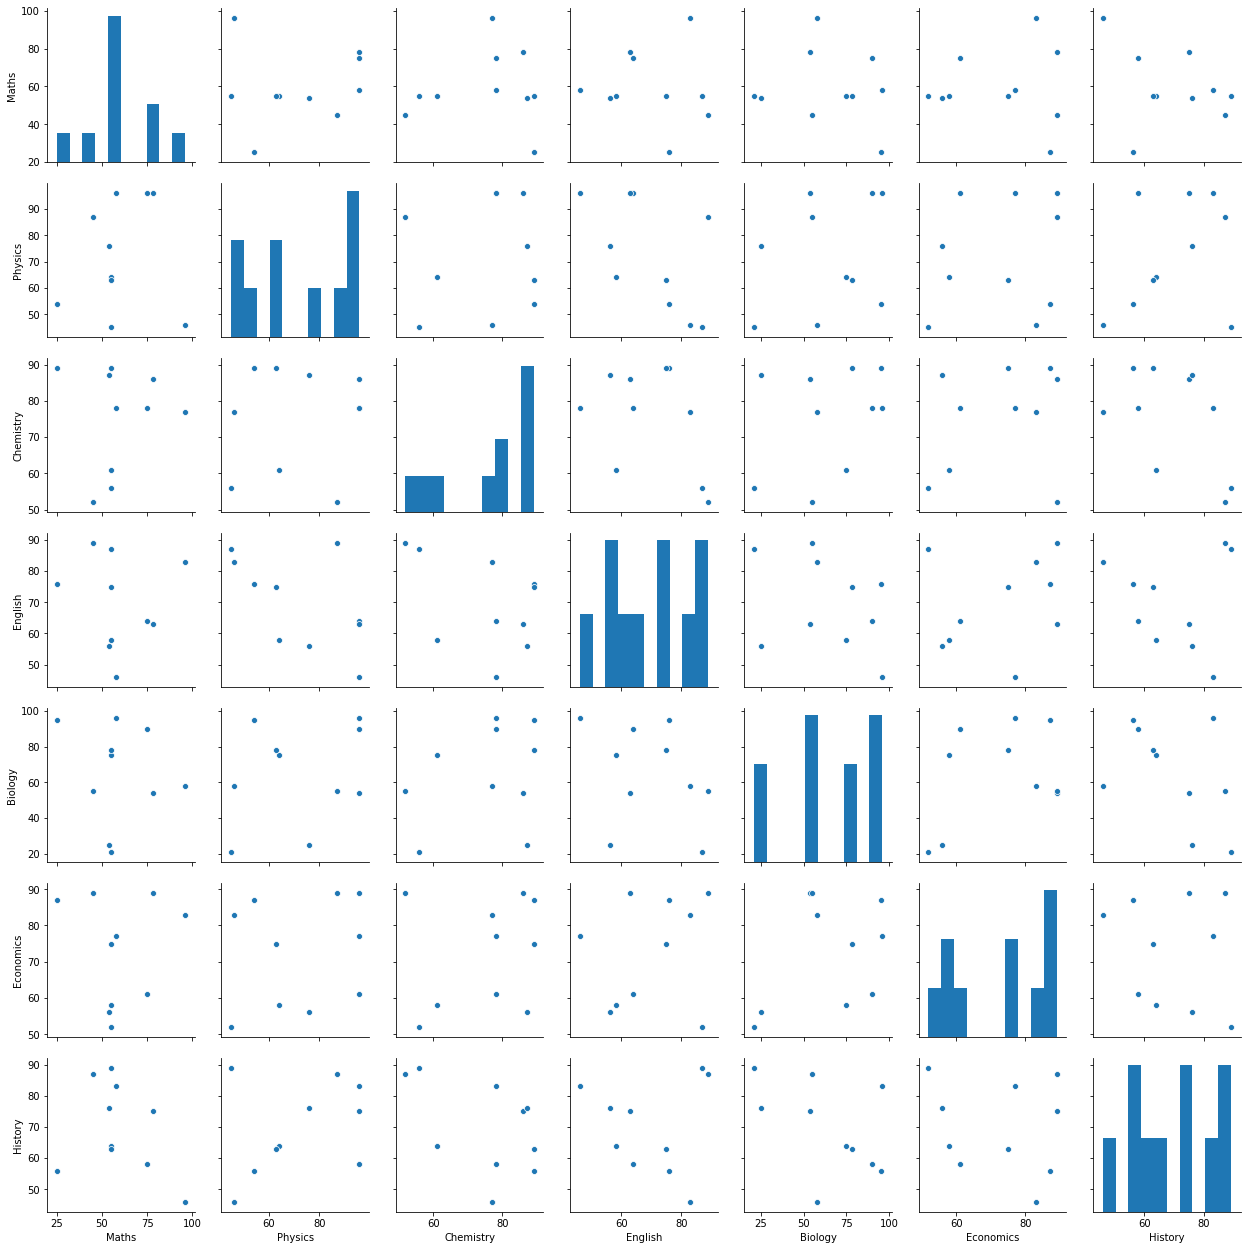

In [44]:
sns.pairplot(df1)

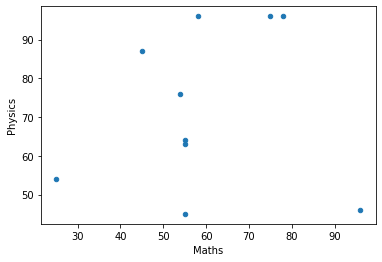

In [45]:
# Bivariate

df1.plot.scatter('Maths','Physics')

In [46]:
df1.isnull().sum()

Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
dtype: int64

In [47]:
# No null values

In [48]:
df1.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
dtype: float64